In [114]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import svm

In [2]:
# data directory
DATA_DIR = os.path.join('C:', 'data\processed')

In [3]:
data_paths = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'A', 'A_hhold_test.csv')}, 
              
              'B': {'train': os.path.join(DATA_DIR, 'B', 'B_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'B', 'B_hhold_test.csv')}, 
              
              'C': {'train': os.path.join(DATA_DIR, 'C', 'C_hhold_train.csv'), 
                    'test':  os.path.join(DATA_DIR, 'C', 'C_hhold_test.csv')}}

In [4]:
# load training data
a_train = pd.read_csv(data_paths['A']['train'], index_col='id')
b_train = pd.read_csv(data_paths['B']['train'], index_col='id')
c_train = pd.read_csv(data_paths['C']['train'], index_col='id')

In [5]:
a_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


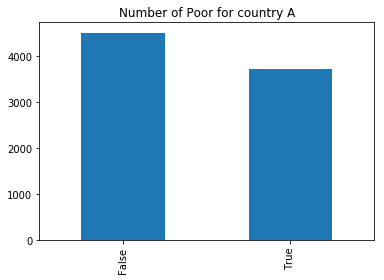

In [6]:
a_train.poor.value_counts().plot.bar(title='Number of Poor for country A')

In [7]:
a_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.6+ MB


In [8]:
# Standardize features
def standardize(df, numeric_only=True):
    numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # subtracy mean and divide by std
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    
    return df
    

def pre_process_data(df, enforce_cols=None):
    print("Input shape:\t{}".format(df.shape))
        

    df = standardize(df)
    print("After standardization {}".format(df.shape))
        
    # create dummy variables for categoricals
    df = pd.get_dummies(df)
    print("After converting categoricals:\t{}".format(df.shape))
    

    # match test set and training set columns
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)

        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    df.fillna(0, inplace=True)
    
    return df

In [9]:
print("Country A")
aX_train = pre_process_data(a_train.drop('poor', axis=1))
ay_train = np.ravel(a_train.poor)

print("\nCountry B")
bX_train = pre_process_data(b_train.drop('poor', axis=1))
by_train = np.ravel(b_train.poor)

print("\nCountry C")
cX_train = pre_process_data(c_train.drop('poor', axis=1))
cy_train = np.ravel(c_train.poor)

Country A
Input shape:	(8203, 344)
After standardization (8203, 344)
After converting categoricals:	(8203, 859)

Country B
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)

Country C
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)


In [10]:
from sklearn.ensemble import RandomForestClassifier

def train_model(features, labels, **kwargs):
    
    # instantiate model
    model = RandomForestClassifier(n_estimators=50, random_state=0)
    
    # train model
    model.fit(features, labels)
    
    # get a (not-very-useful) sense of performance
    accuracy = model.score(features, labels)
    print(f"In-sample accuracy: {accuracy:0.2%}")
    
    return model

In [11]:
model_a = train_model(aX_train, ay_train)
model_b = train_model(bX_train, by_train)
model_c = train_model(cX_train, cy_train)

In-sample accuracy: 100.00%
In-sample accuracy: 99.94%
In-sample accuracy: 100.00%


In [12]:
a_test = pd.read_csv(data_paths['A']['test'], index_col='id')
b_test = pd.read_csv(data_paths['B']['test'], index_col='id')
c_test = pd.read_csv(data_paths['C']['test'], index_col='id')

In [13]:
a_test = pre_process_data(a_test, enforce_cols=aX_train.columns)
b_test = pre_process_data(b_test, enforce_cols=bX_train.columns)
c_test = pre_process_data(c_test, enforce_cols=cX_train.columns)

Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)


In [14]:
a_preds = model_a.predict_proba(a_test)
b_preds = model_b.predict_proba(b_test)
c_preds = model_c.predict_proba(c_test)

In [15]:
def make_country_sub(preds, test_feat, country):
    # make sure we code the country correctly
    country_codes = ['A', 'B', 'C']
    
    # get just the poor probabilities
    country_sub = pd.DataFrame(data=preds[:, 1],  # proba p=1
                               columns=['poor'], 
                               index=test_feat.index)

    
    # add the country code for joining later
    country_sub["country"] = country
    return country_sub[["country", "poor"]]

In [16]:
# convert preds to data frames
a_sub = make_country_sub(a_preds, a_test, 'A')
b_sub = make_country_sub(b_preds, b_test, 'B')
c_sub = make_country_sub(c_preds, c_test, 'C')

In [17]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [76]:
from sklearn.model_selection import train_test_split
aX_sp_train, aX_test, ay_sp_train, ay_test = train_test_split(aX_train, ay_train, random_state=42)
bX_sp_train, bX_test, by_sp_train, by_test = train_test_split(bX_train, by_train, random_state=42)
cX_sp_train, cX_test, cy_sp_train, cy_test = train_test_split(cX_train, cy_train, random_state=42)

In [146]:
from sklearn.model_selection import cross_val_score
a_clf = svm.SVC(kernel='linear', C=1, probability=True)
a_scores = cross_val_score(a_clf, aX_train, ay_train, cv=5)
a_clf.fit(aX_train, ay_train)
print(a_scores)

b_clf = svm.SVC(kernel='linear', C=1, probability=True)
b_scores = cross_val_score(b_clf, bX_train, by_train, cv=5)
b_clf.fit(bX_train, by_train)
print(b_scores)

c_clf = svm.SVC(kernel='linear', C=1, probability=True)
c_scores = cross_val_score(c_clf, cX_train, cy_train, cv=5)
c_clf.fit(cX_train, cy_train)
print(c_scores)

a_pred = a_clf.predict_proba(a_test)
b_pred = b_clf.predict_proba(b_test)
c_pred = c_clf.predict_proba(c_test)

a_sub = make_country_sub(a_pred, a_test, 'A')
b_sub = make_country_sub(b_pred, b_test, 'B')
c_sub = make_country_sub(c_pred, c_test, 'C')

submission5 = pd.concat([a_sub, b_sub, c_sub])
submission5.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s5 = submission.join(submission5, sort=False)
s5.drop(['country_y', 'poor'], axis=1, inplace=True)
s5.rename(columns={'poor_y':'poor'}, inplace=True)

[ 0.86288848  0.8702011   0.8622791   0.875       0.85365854]
[ 0.87730061  0.86328725  0.87250384  0.86635945  0.87692308]
[ 0.91814672  0.89953632  0.9072643   0.90796597  0.92420727]


In [153]:
clf = svm.SVC(kernel='linear', C=1, probability=True)
a_scores = cross_val_score(clf, aX_sp_train, ay_sp_train, cv=5)
clf.fit(aX_sp_train, ay_sp_train)
print(a_scores)
a_predict = clf.predict(aX_test)
a_accuracy = accuracy_score(ay_test, a_predict)
print("Country A: ", a_accuracy)
print(metrics.classification_report(ay_test, a_predict))


b_scores = cross_val_score(clf, bX_sp_train, by_sp_train, cv=5)
clf.fit(bX_sp_train, by_sp_train)
print(b_scores)
b_predict = clf.predict(bX_test)
b_accuracy = accuracy_score(by_test, b_predict)
print("Country B: ", b_accuracy)
print(metrics.classification_report(by_test, b_predict))


c_scores = cross_val_score(clf, cX_sp_train, cy_sp_train, cv=5)
clf.fit(cX_sp_train, cy_sp_train)
print(c_scores)
c_predict = clf.predict(cX_test)
c_accuracy = accuracy_score(cy_test, c_predict)
print("Country C: ", c_accuracy)
print(metrics.classification_report(cy_test, c_predict))


[ 0.85946385  0.83509342  0.87002437  0.85853659  0.8551668 ]
Country A:  0.875670404681
             precision    recall  f1-score   support

      False       0.89      0.88      0.89      1146
       True       0.85      0.87      0.86       905

avg / total       0.88      0.88      0.88      2051

[ 0.85071575  0.87321063  0.85040984  0.88114754  0.8788501 ]
Country B:  0.900491400491
             precision    recall  f1-score   support

      False       0.96      0.94      0.95       770
       True       0.18      0.23      0.20        44

avg / total       0.91      0.90      0.91       814

[ 0.90525232  0.89083419  0.89587629  0.90309278  0.8998968 ]
Country C:  0.914091470952
             precision    recall  f1-score   support

      False       0.95      0.95      0.95      1382
       True       0.70      0.73      0.71       236

avg / total       0.92      0.91      0.91      1618



In [147]:
a_clf = svm.SVC(kernel='linear', C=1, probability=True)
a_scores = cross_val_score(a_clf, aX_train, ay_train, cv=10)
b_clf = svm.SVC(kernel='linear', C=1, probability=True)
b_scores = cross_val_score(b_clf, bX_train, by_train, cv=10)
c_clf = svm.SVC(kernel='linear', C=1, probability=True)
c_scores = cross_val_score(c_clf, cX_train, cy_train, cv=10)

a_clf.fit(aX_train, ay_train)
b_clf.fit(bX_train, by_train)
c_clf.fit(cX_train, cy_train)

a_pred = a_clf.predict_proba(a_test)
b_pred = b_clf.predict_proba(b_test)
c_pred = c_clf.predict_proba(c_test)

a_sub = make_country_sub(a_pred, a_test, 'A')
b_sub = make_country_sub(b_pred, b_test, 'B')
c_sub = make_country_sub(c_pred, c_test, 'C')

submission6 = pd.concat([a_sub, b_sub, c_sub])
submission6.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s6 = submission.join(submission6, sort=False)
s6.drop(['country_y', 'poor'], axis=1, inplace=True)
s6.rename(columns={'poor_y':'poor'}, inplace=True)
s6.head()

,country,poor
id,,
418,A,3.246421e-07
41249,A,1.000000e-07
16205,A,1.293609e-05
97501,A,1.000000e-07
67756,A,2.258200e-06


In [148]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

# unbalanced classification
#X, y = make_classification(n_samples=1000, weights=[0.1, 0.9])

# use grid search for tuning hyperparameters
svc = SVC(class_weight='balanced', probability=True)
params_space = {'kernel': ['linear', 'poly', 'rbf']}
# set cv to your K-fold cross-validation
gs = GridSearchCV(svc, params_space, n_jobs=-1, cv=5)
# fit the estimator

In [149]:
gs.fit(aX_train, ay_train)
a_prob = gs.predict_proba(a_test)

gs.fit(bX_train, by_train)
b_prob = gs.predict_proba(b_test)

gs.fit(cX_train, cy_train)
c_prob = gs.predict_proba(c_test)

a_sub = make_country_sub(a_prob, a_test, 'A')
b_sub = make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission7 = pd.concat([a_sub, b_sub, c_sub])
submission7.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s7 = submission.join(submission7, sort=False)
s7.drop(['country_y', 'poor'], axis=1, inplace=True)
s7.rename(columns={'poor_y':'poor'}, inplace=True)
s7.head()

,country,poor
id,,
418,A,1.128305e-06
41249,A,1.000000e-07
16205,A,2.426247e-05
97501,A,1.000000e-07
67756,A,4.856018e-06


In [145]:
gs.fit(aX_sp_train, ay_sp_train)
a_prob = gs.predict_proba(aX_test)
a_predict = gs.predict(aX_test)
a_accuracy = accuracy_score(ay_test, a_predict)
print("Country A: ", a_accuracy)
print(metrics.classification_report(ay_test, a_predict))

gs.fit(bX_sp_train, by_sp_train)
b_prob = gs.predict_proba(bX_test)
b_predict = gs.predict(bX_test)
b_accuracy = accuracy_score(by_test, b_predict)
print("Country B: ", b_accuracy)
print(metrics.classification_report(by_test, b_predict))

gs.fit(cX_sp_train, cy_sp_train)
c_prob = gs.predict_proba(cX_test)
c_predict = gs.predict(cX_test)
c_accuracy = accuracy_score(cy_test, c_predict)
print("Country C: ", c_accuracy)
print(metrics.classification_report(cy_test, c_predict))

Country A:  0.873720136519
             precision    recall  f1-score   support

      False       0.90      0.87      0.88      1146
       True       0.84      0.88      0.86       905

avg / total       0.88      0.87      0.87      2051

Country B:  0.902948402948
             precision    recall  f1-score   support

      False       0.96      0.94      0.95       770
       True       0.19      0.25      0.22        44

avg / total       0.92      0.90      0.91       814

Country C:  0.894932014833
             precision    recall  f1-score   support

      False       0.97      0.90      0.94      1382
       True       0.60      0.86      0.71       236

avg / total       0.92      0.89      0.90      1618



In [38]:
data_paths_ind = {'A': {'train': os.path.join(DATA_DIR, 'A', 'A_indiv_train.csv'), 
                        'test':  os.path.join(DATA_DIR, 'A', 'A_indiv_test.csv')}, 
              
                  'B': {'train': os.path.join(DATA_DIR, 'B', 'B_indiv_train.csv'), 
                        'test':  os.path.join(DATA_DIR, 'B', 'B_indiv_test.csv')}, 
              
                  'C': {'train': os.path.join(DATA_DIR, 'C', 'C_indiv_train.csv'), 
                        'test':  os.path.join(DATA_DIR, 'C', 'C_indiv_test.csv')}}

In [39]:
# load training data
a_indiv_train = pd.read_csv(data_paths_ind['A']['train'], index_col=['id','iid'])
b_indiv_train = pd.read_csv(data_paths_ind['B']['train'], index_col=['id','iid'])
c_indiv_train = pd.read_csv(data_paths_ind['C']['train'], index_col=['id','iid'])

In [40]:
print("Country A")
aX_indiv_train = pre_process_data(a_indiv_train.drop('poor', axis=1))
ay_indiv_train = np.ravel(a_indiv_train.poor)

print("\nCountry B")
bX_indiv_train = pre_process_data(b_indiv_train.drop('poor', axis=1))
by_indiv_train = np.ravel(b_indiv_train.poor)

print("\nCountry C")
cX_indiv_train = pre_process_data(c_indiv_train.drop('poor', axis=1))
cy_indiv_train = np.ravel(c_indiv_train.poor)

Country A
Input shape:	(37560, 41)
After standardization (37560, 41)
After converting categoricals:	(37560, 274)

Country B
Input shape:	(20252, 224)
After standardization (20252, 224)
After converting categoricals:	(20252, 1641)

Country C
Input shape:	(29913, 41)
After standardization (29913, 41)
After converting categoricals:	(29913, 300)


In [41]:
aX_indiv_train_group = aX_indiv_train.groupby(['id']).sum()
bX_indiv_train_group = bX_indiv_train.groupby(['id']).sum()
cX_indiv_train_group = cX_indiv_train.groupby(['id']).sum()

In [42]:
aX_train_merge = aX_train.merge(aX_indiv_train_group, how='outer', left_index=True, right_index=True)
bX_train_merge = bX_train.merge(bX_indiv_train_group, how='outer', left_index=True, right_index=True)
cX_train_merge = cX_train.merge(cX_indiv_train_group, how='outer', left_index=True, right_index=True)

In [43]:
a_indiv_test = pd.read_csv(data_paths_ind['A']['test'], index_col=['id','iid'])
b_indiv_test = pd.read_csv(data_paths_ind['B']['test'], index_col=['id','iid'])
c_indiv_test = pd.read_csv(data_paths_ind['C']['test'], index_col=['id','iid'])

In [44]:
a_indiv_test = pre_process_data(a_indiv_test, enforce_cols=aX_indiv_train.columns)
b_indiv_test = pre_process_data(b_indiv_test, enforce_cols=bX_indiv_train.columns)
c_indiv_test = pre_process_data(c_indiv_test, enforce_cols=cX_indiv_train.columns)

Input shape:	(18535, 41)
After standardization (18535, 41)
After converting categoricals:	(18535, 273)
Input shape:	(10066, 224)
After standardization (10066, 224)
After converting categoricals:	(10066, 1534)
Input shape:	(14701, 41)
After standardization (14701, 41)
After converting categoricals:	(14701, 301)


In [45]:
a_indiv_test_group = a_indiv_test.groupby(['id']).sum()
b_indiv_test_group = b_indiv_test.groupby(['id']).sum()
c_indiv_test_group = c_indiv_test.groupby(['id']).sum()

In [46]:
a_test_merge = a_test.merge(a_indiv_test_group, how='outer', left_index=True, right_index=True)
b_test_merge = b_test.merge(b_indiv_test_group, how='outer', left_index=True, right_index=True)
c_test_merge = c_test.merge(c_indiv_test_group, how='outer', left_index=True, right_index=True)

In [47]:
model_a = train_model(aX_train_merge, ay_train)
model_b = train_model(bX_train_merge, by_train)
model_c = train_model(cX_train_merge, cy_train)

a_pred = model_a.predict_proba(a_test_merge)
b_pred = model_b.predict_proba(b_test_merge)
c_pred = model_c.predict_proba(c_test_merge)

# convert preds to data frames
a_merge_sub = make_country_sub(a_pred, a_test_merge, 'A')
b_merge_sub = make_country_sub(b_pred, b_test_merge, 'B')
c_merge_sub = make_country_sub(c_pred, c_test_merge, 'C')

submission2 = pd.concat([a_merge_sub, b_merge_sub, c_merge_sub])
submission2.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s2 = submission.join(submission2, sort=False)
s2.drop(['country_y', 'poor'], axis=1, inplace=True)
s2.rename(columns={'poor_y':'poor'}, inplace=True)
s2.head()

In-sample accuracy: 100.00%
In-sample accuracy: 99.88%
In-sample accuracy: 99.92%


In [ ]:
# Applying gridsearch method on merge dataset
gs.fit(aX_train_merge, ay_train)
a_prob = gs.predict_proba(a_test_merge)

gs.fit(bX_train_merge, by_train)
b_prob = gs.predict_proba(b_test_merge)

gs.fit(cX_train_merge, cy_train)
c_prob = gs.predict_proba(c_test_merge)

a_sub = make_country_sub(a_prob, a_test_merge, 'A')
b_sub = make_country_sub(b_prob, b_test_merge, 'B')
c_sub = make_country_sub(c_prob, c_test_merge, 'C')

submission8 = pd.concat([a_sub, b_sub, c_sub])
submission8.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s8 = submission.join(submission8, sort=False)
s8.drop(['country_y', 'poor'], axis=1, inplace=True)
s8.rename(columns={'poor_y':'poor'}, inplace=True)

In [143]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(model, aX_train, ay_train)
scores
model.fit(aX_train, ay_train)
a_prob = model.predict_proba(a_test)
model.fit(bX_train, by_train)
b_prob = model.predict_proba(b_test)
model.fit(cX_train, cy_train)
c_prob = model.predict_proba(c_test)

a_sub = make_country_sub(a_prob, a_test, 'A')
b_sub = make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission11 = pd.concat([a_sub, b_sub, c_sub])
submission11.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s11 = submission.join(submission11, sort=False)
s11.drop(['country_y', 'poor'], axis=1, inplace=True)
s11.rename(columns={'poor_y':'poor'}, inplace=True)

In [142]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)

model.fit(aX_sp_train, ay_sp_train)
a_prob = model.predict_proba(aX_test)
a_predict = model.predict(aX_test)
a_accuracy = accuracy_score(ay_test, a_predict)
print("Country A: ", a_accuracy)
print(metrics.classification_report(ay_test, a_predict))


model.fit(bX_sp_train, by_sp_train)
b_prob = model.predict_proba(bX_test)
b_predict = model.predict(bX_test)
b_accuracy = accuracy_score(by_test, b_predict)
print("Country B: ", b_accuracy)
print(metrics.classification_report(by_test, b_predict))


model.fit(cX_sp_train, cy_sp_train)
c_prob = model.predict_proba(cX_test)
c_predict = knn.predict(cX_test)
c_accuracy = accuracy_score(cy_test, c_predict)
print("Country C: ", c_accuracy)
print(metrics.classification_report(cy_test, c_predict))

Country A:  0.866894197952
             precision    recall  f1-score   support

      False       0.88      0.88      0.88      1146
       True       0.85      0.85      0.85       905

avg / total       0.87      0.87      0.87      2051

Country B:  0.927518427518
             precision    recall  f1-score   support

      False       0.96      0.96      0.96       770
       True       0.32      0.30      0.31        44

avg / total       0.93      0.93      0.93       814

Country C:  0.876390605686
             precision    recall  f1-score   support

      False       0.89      0.98      0.93      1382
       True       0.70      0.27      0.39       236

avg / total       0.86      0.88      0.85      1618



In [57]:
model = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(model, aX_train_merge, ay_train)
scores

model.fit(aX_train_merge, ay_train)
a_prob = model.predict_proba(a_test_merge)
model.fit(bX_train_merge, by_train)

b_prob = model.predict_proba(b_test_merge)
model.fit(cX_train_merge, cy_train)
c_prob = model.predict_proba(c_test_merge)

a_sub = make_country_sub(a_prob, a_test, 'A')
b_sub = make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission12 = pd.concat([a_sub, b_sub, c_sub])
submission12.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s12 = submission.join(submission12, sort=False)
s12.drop(['country_y', 'poor'], axis=1, inplace=True)
s12.rename(columns={'poor_y':'poor'}, inplace=True)

,country,poor
id,,
418,A,0.499313
41249,A,0.509709
16205,A,0.502378
97501,A,0.595738
67756,A,0.498687


In [59]:
#from sklearn.ensemble import GradientBoostingClassifier

#X, y = make_hastie_10_2(random_state=0)
#X_train, X_test = X[:2000], X[2000:]
#y_train, y_test = y[:2000], y[2000:]

#model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
#model.score(X_test, y_test)

In [60]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(aX_train, ay_train)
a_prob = model.predict_proba(a_test)

model = model.fit(bX_train, by_train)
b_prob = model.predict_proba(b_test)

model = model.fit(cX_train, cy_train)
c_prob = model.predict_proba(c_test)


a_sub = make_country_sub(a_prob, a_test, 'A')
b_sub = make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission13 = pd.concat([a_sub, b_sub, c_sub])
submission13.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s13 = submission.join(submission13, sort=False)
s13.drop(['country_y', 'poor'], axis=1, inplace=True)
s13.rename(columns={'poor_y':'poor'}, inplace=True)
s13.head()

,country,poor
id,,
418,A,0.0
41249,A,0.0
16205,A,0.0
97501,A,0.0
67756,A,0.0


k: 1, Train/Test Score: 1.000/0.706
k: 3, Train/Test Score: 0.839/0.710
k: 5, Train/Test Score: 0.792/0.717
k: 7, Train/Test Score: 0.773/0.715
k: 9, Train/Test Score: 0.762/0.722
k: 11, Train/Test Score: 0.754/0.727
k: 13, Train/Test Score: 0.746/0.727
k: 15, Train/Test Score: 0.740/0.722
k: 17, Train/Test Score: 0.732/0.724
k: 19, Train/Test Score: 0.726/0.719


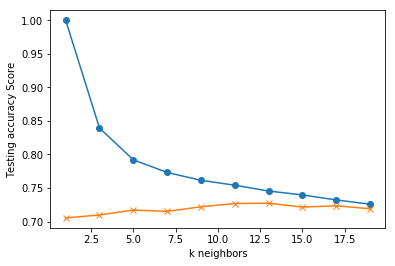

In [136]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
kmeans = KMeans(n_clusters=4)

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(aX_sp_train, ay_sp_train)
    train_score = knn.score(aX_sp_train, ay_sp_train)
    test_score = knn.score(aX_test, ay_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [137]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(aX_sp_train, ay_sp_train)
a_prob = knn.predict_proba(aX_test)
a_predict = knn.predict(aX_test)

a_accuracy = accuracy_score(ay_test, a_predict)
print("Country A: ", a_accuracy)
print(metrics.classification_report(ay_test, a_predict))

Country A:  0.723549488055
             precision    recall  f1-score   support

      False       0.95      0.54      0.68      1146
       True       0.62      0.96      0.75       905

avg / total       0.80      0.72      0.72      2051



k: 1, Train/Test Score: 1.000/0.889
k: 3, Train/Test Score: 0.935/0.920
k: 5, Train/Test Score: 0.932/0.929
k: 7, Train/Test Score: 0.921/0.935
k: 9, Train/Test Score: 0.921/0.937
k: 11, Train/Test Score: 0.918/0.941
k: 13, Train/Test Score: 0.919/0.942
k: 15, Train/Test Score: 0.919/0.942
k: 17, Train/Test Score: 0.918/0.941
k: 19, Train/Test Score: 0.919/0.945


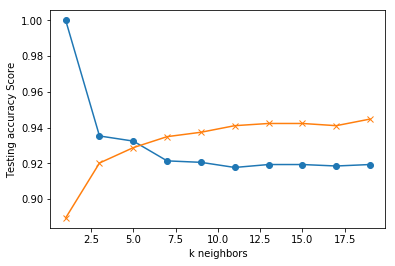

In [138]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(bX_sp_train, by_sp_train)
    train_score = knn.score(bX_sp_train, by_sp_train)
    test_score = knn.score(bX_test, by_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [139]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(bX_sp_train, by_sp_train)
b_prob = knn.predict_proba(bX_test)
b_predict = knn.predict(bX_test)

b_accuracy = accuracy_score(by_test, b_predict)
print("Country B: ", b_accuracy)
print(metrics.classification_report(by_test, b_predict))

Country B:  0.941031941032
             precision    recall  f1-score   support

      False       0.95      0.99      0.97       770
       True       0.33      0.09      0.14        44

avg / total       0.92      0.94      0.92       814



k: 1, Train/Test Score: 1.000/0.831
k: 3, Train/Test Score: 0.928/0.862
k: 5, Train/Test Score: 0.908/0.870
k: 7, Train/Test Score: 0.898/0.870
k: 9, Train/Test Score: 0.897/0.871
k: 11, Train/Test Score: 0.890/0.872
k: 13, Train/Test Score: 0.889/0.873
k: 15, Train/Test Score: 0.886/0.876
k: 17, Train/Test Score: 0.884/0.873
k: 19, Train/Test Score: 0.882/0.873


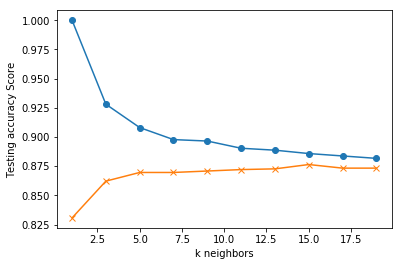

In [140]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(cX_sp_train, cy_sp_train)
    train_score = knn.score(cX_sp_train, cy_sp_train)
    test_score = knn.score(cX_test, cy_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [141]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(cX_sp_train, cy_sp_train)
c_prob = knn.predict_proba(cX_test)
c_predict = knn.predict(cX_test)

c_accuracy = accuracy_score(cy_test, c_predict)
print("Country C: ", c_accuracy)
print(metrics.classification_report(cy_test, c_predict))

Country C:  0.876390605686
             precision    recall  f1-score   support

      False       0.89      0.98      0.93      1382
       True       0.70      0.27      0.39       236

avg / total       0.86      0.88      0.85      1618



In [68]:
a_sub = make_country_sub(a_prob, a_test, 'A')
b_sub = make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission14 = pd.concat([a_sub, b_sub, c_sub])
submission14.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s14 = submission.join(submission14, sort=False)
s14.drop(['country_y', 'poor'], axis=1, inplace=True)
s14.rename(columns={'poor_y':'poor'}, inplace=True)
s14.head()

,country,poor
id,,
418,A,0.176471
41249,A,0.117647
16205,A,0.470588
97501,A,0.176471
67756,A,0.529412


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import (StratifiedKFold, cross_val_score,
                                      train_test_split)

In [84]:
logreg = LogisticRegression()

logreg.fit(aX_train, ay_train)
a_prob = logreg.predict_proba(a_test)
logreg.fit(bX_train, by_train)
b_prob = logreg.predict_proba(b_test)
logreg.fit(cX_train, cy_train)
c_prob = logreg.predict_proba(c_test)

a_sub=make_country_sub(a_prob, a_test, 'A')
b_sub= make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission3 = pd.concat([a_sub, b_sub, c_sub])
submission3.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s3 = submission.join(submission3, sort=False)
s3.drop(['country_y', 'poor'], axis=1, inplace=True)
s3.rename(columns={'poor_y':'poor'}, inplace=True)
s3.head()

,country,poor
id,,
418,A,1.310081e-07
41249,A,2.166442e-11
16205,A,2.179036e-06
97501,A,1.291727e-11
67756,A,1.184744e-07


In [94]:
logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(aX_train, ay_train)
a_prob = logreg.predict_proba(a_test)
logreg.fit(bX_train, by_train)
b_prob = logreg.predict_proba(b_test)
logreg.fit(cX_train, cy_train)
c_prob = logreg.predict_proba(c_test)

a_sub=make_country_sub(a_prob, a_test, 'A')
b_sub= make_country_sub(b_prob, b_test, 'B')
c_sub = make_country_sub(c_prob, c_test, 'C')

submission3_2 = pd.concat([a_sub, b_sub, c_sub])
submission3_2.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s3_2 = submission.join(submission3_2, sort=False)
s3_2.drop(['country_y', 'poor'], axis=1, inplace=True)
s3_2.rename(columns={'poor_y':'poor'}, inplace=True)
s3_2.head()

,country,poor
id,,
418,A,1.769687e-07
41249,A,2.577805e-11
16205,A,2.246612e-06
97501,A,1.180038e-11
67756,A,1.495484e-07


In [86]:
logreg = LogisticRegression()

logreg.fit(aX_train_merge, ay_train)
a_prob = logreg.predict_proba(a_test_merge)
logreg.fit(bX_train_merge, by_train)
b_prob = logreg.predict_proba(b_test_merge)
logreg.fit(cX_train_merge, cy_train)
c_prob = logreg.predict_proba(c_test_merge)

a_sub=make_country_sub(a_prob, a_test_merge, 'A')
b_sub= make_country_sub(b_prob, b_test_merge, 'B')
c_sub = make_country_sub(c_prob, c_test_merge, 'C')

submission4 = pd.concat([a_sub, b_sub, c_sub])
submission4.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s4 = submission.join(submission4, sort=False)
s4.drop(['country_y', 'poor'], axis=1, inplace=True)
s4.rename(columns={'poor_y':'poor'}, inplace=True)
s4.head()

,country,poor
id,,
418,A,0.999922
41249,A,0.025788
16205,A,0.999807
97501,A,0.413522
67756,A,0.541310


In [88]:
logreg = LogisticRegression(class_weight='balanced')

logreg.fit(aX_train_merge, ay_train)
a_prob = logreg.predict_proba(a_test_merge)
logreg.fit(bX_train_merge, by_train)
b_prob = logreg.predict_proba(b_test_merge)
logreg.fit(cX_train_merge, cy_train)
c_prob = logreg.predict_proba(c_test_merge)

a_sub=make_country_sub(a_prob, a_test_merge, 'A')
b_sub= make_country_sub(b_prob, b_test_merge, 'B')
c_sub = make_country_sub(c_prob, c_test_merge, 'C')

submission4_2 = pd.concat([a_sub, b_sub, c_sub])
submission4_2.rename(columns={'country':'country_y', 'poor':'poor_y'}, inplace=True)
s4_2 = submission.join(submission4_2, sort=False)
s4_2.drop(['country_y', 'poor'], axis=1, inplace=True)
s4_2.rename(columns={'poor_y':'poor'}, inplace=True)
s4_2.head()

,country,poor
id,,
418,A,0.999943
41249,A,0.029359
16205,A,0.999874
97501,A,0.456938
67756,A,0.600870


In [196]:
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

logreg = LogisticRegression(class_weight = 'balanced')

logreg.fit(aX_sp_train, ay_sp_train)
a_prob = logreg.predict_proba(aX_test)
a_predict = logreg.predict(aX_test)
a_accuracy = accuracy_score(ay_test, a_predict)
print ("Country A")
print("Accuracy of country A : ", a_accuracy)
a_roc = roc_auc_score(ay_test, a_predict)
print("ROC of country A : ", a_roc)
print(metrics.classification_report(ay_test, a_predict))

logreg.fit(bX_sp_train, by_sp_train)
b_prob = logreg.predict_proba(bX_test)
b_predict = logreg.predict(bX_test)
b_accuracy = accuracy_score(by_test, b_predict)
print ("Country B")
print("Accuracy of country B : ", b_accuracy)
b_roc = roc_auc_score(by_test, b_predict)
print("ROC of country B : ", b_roc)
print(metrics.classification_report(by_test, b_predict))

logreg.fit(cX_sp_train, cy_sp_train)
c_prob = logreg.predict_proba(cX_test)
c_predict = logreg.predict(cX_test)
c_accuracy = accuracy_score(cy_test, c_predict)
print ("Country C")
print("Accuracy of country C : ", c_accuracy)
c_roc = roc_auc_score(cy_test, c_predict)
print("ROC of country C : ", c_roc)
print(metrics.classification_report(cy_test, c_predict))

Country A
Accuracy of country A :  0.870307167235
ROC of country A :  0.871396064139
             precision    recall  f1-score   support

      False       0.90      0.86      0.88      1146
       True       0.83      0.88      0.86       905

avg / total       0.87      0.87      0.87      2051

Country B
Accuracy of country B :  0.89312039312
ROC of country B :  0.632792207792
             precision    recall  f1-score   support

      False       0.96      0.92      0.94       770
       True       0.21      0.34      0.26        44

avg / total       0.92      0.89      0.91       814

Country C
Accuracy of country C :  0.879480840544
ROC of country C :  0.883771983615
             precision    recall  f1-score   support

      False       0.98      0.88      0.93      1382
       True       0.55      0.89      0.68       236

avg / total       0.92      0.88      0.89      1618



In [202]:
from sklearn import metrics
import pandas as pd
from ggplot import *

a_pred = logreg.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ay_test, a_pred)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

ModuleNotFoundError: No module named 'ggplot'

In [154]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

model = XGBClassifier()
model.fit(aX_sp_train, ay_sp_train)
a_predict = model.predict(aX_test)

a_accuracy = accuracy_score(ay_test, a_predict)
print("Country A: ", a_accuracy)
print(metrics.classification_report(ay_test, a_predict))

model.fit(bX_sp_train, by_sp_train)
b_predict = model.predict(bX_test)

b_accuracy = accuracy_score(by_test, b_predict)
print("Country B: ", b_accuracy)
print(metrics.classification_report(by_test, b_predict))

model.fit(cX_sp_train, cy_sp_train)
c_predict = model.predict(cX_test)

c_accuracy = accuracy_score(cy_test, c_predict)
print("Country C: ", c_accuracy)
print(metrics.classification_report(cy_test, c_predict))


Country A:  0.857630424183
             precision    recall  f1-score   support

      False       0.87      0.87      0.87      1146
       True       0.84      0.84      0.84       905

avg / total       0.86      0.86      0.86      2051

Country B:  0.944717444717
             precision    recall  f1-score   support

      False       0.95      0.99      0.97       770
       True       0.45      0.11      0.18        44

avg / total       0.92      0.94      0.93       814

Country C:  0.996291718171
             precision    recall  f1-score   support

      False       1.00      1.00      1.00      1382
       True       0.99      0.98      0.99       236

avg / total       1.00      1.00      1.00      1618



In [155]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

clf = svm.SVC(kernel='linear', C=1, probability=True)
a_clf_isotonic = CalibratedClassifierCV(clf, cv=5, method='isotonic')
a_clf_isotonic.fit(aX_sp_train, ay_sp_train)

a_prob_pos_isotonic = a_clf_isotonic.predict_proba(aX_test)[:, 1]
a_clf_isotonic_score = brier_score_loss(ay_test, a_prob_pos_isotonic)
print("With isotonic calibration: %1.3f" % a_clf_isotonic_score)


b_clf_isotonic = CalibratedClassifierCV(clf, cv=5, method='isotonic')
b_clf_isotonic.fit(bX_sp_train, by_sp_train)

b_prob_pos_isotonic = b_clf_isotonic.predict_proba(bX_test)[:, 1]
b_clf_isotonic_score = brier_score_loss(by_test, b_prob_pos_isotonic)
print("With isotonic calibration: %1.3f" % b_clf_isotonic_score)

c_clf_isotonic = CalibratedClassifierCV(clf, cv=5, method='isotonic')
c_clf_isotonic.fit(cX_sp_train, cy_sp_train)

c_prob_pos_isotonic = c_clf_isotonic.predict_proba(cX_test)[:, 1]
c_clf_isotonic_score = brier_score_loss(cy_test, c_prob_pos_isotonic)
print("With isotonic calibration: %1.3f" % c_clf_isotonic_score)

a_predict = a_clf_isotonic.predict(aX_test)
b_predict = b_clf_isotonic.predict(bX_test)
c_predict = c_clf_isotonic.predict(cX_test)

a_accuracy = accuracy_score(ay_test, a_predict)
print("Country A: ", a_accuracy)
print(metrics.classification_report(ay_test, a_predict))

b_accuracy = accuracy_score(by_test, b_predict)
print("Country B: ", b_accuracy)
print(metrics.classification_report(by_test, b_predict))

c_accuracy = accuracy_score(cy_test, c_predict)
print("Country C: ", c_accuracy)
print(metrics.classification_report(cy_test, c_predict))

With isotonic calibration: 0.094
With isotonic calibration: 0.049
With isotonic calibration: 0.062
Country A:  0.873232569478
             precision    recall  f1-score   support

      False       0.90      0.88      0.89      1146
       True       0.85      0.87      0.86       905

avg / total       0.87      0.87      0.87      2051

Country B:  0.945945945946
             precision    recall  f1-score   support

      False       0.95      1.00      0.97       770
       True       0.50      0.02      0.04        44

avg / total       0.92      0.95      0.92       814

Country C:  0.912237330037
             precision    recall  f1-score   support

      False       0.94      0.96      0.95      1382
       True       0.73      0.63      0.68       236

avg / total       0.91      0.91      0.91      1618



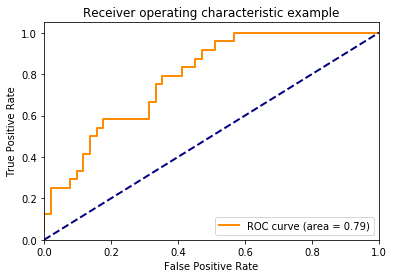

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [168]:
y_test[0:10]

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [185]:
ay_binary_test = label_binarize(ay_test, classes=[0, 1])
n_classes = ay_binary_test.shape[1]

In [193]:
#building 7 models
def Super_Fit_Models():
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB   
  # prepare configuration for cross validation test harness
    seed = 7
  # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))
    models.append(('RF', RandomForestClassifier()))
  # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=5, random_state=seed)
        cv_results = model_selection.cross_val_score(model, aX_sp_train, ay_sp_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
  # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()